<a href="https://colab.research.google.com/github/Abhilash2240/STML/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

(   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
 0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
 1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
 2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
 3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
 4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   
 
                        Histology ER status PR status HER2 status Surgery_type  \
 0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
 3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
 4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   
 
   Date_of_Surgery Date_of_Last_Visit Patient_Status  
 0       20-May-1

<ipython-input-6-a1df335ab87b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])


SVM Accuracy: 80.00%


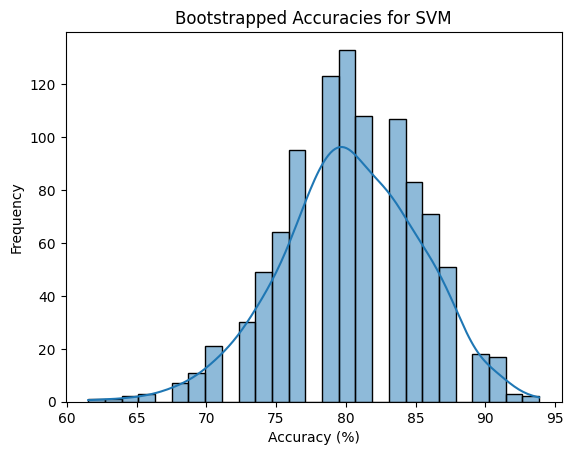

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

data = pd.read_csv('/content/breast_cancer_survival.csv')
data_cleaned = data.dropna(subset=["Patient_Status"])
label_encoder = LabelEncoder()
data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])
data_encoded = pd.get_dummies(data_cleaned, columns=['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type'])
X = data_encoded.drop(columns=['Patient_Status', 'Date_of_Surgery', 'Date_of_Last_Visit'])
y = data_encoded['Patient_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {accuracy_svm:.2f}%")

def bootstrap_accuracy(model, X, y, n_iterations=1000):
    bootstrapped_accuracies = []
    for _ in range(n_iterations):
        X_resample, y_resample = resample(X, y)
        y_pred = model.predict(X_resample)
        acc = accuracy_score(y_resample, y_pred) * 100
        bootstrapped_accuracies.append(acc)
    return bootstrapped_accuracies

bootstrapped_accuracies_svm = bootstrap_accuracy(svm_model, X_test, y_test)
sns.histplot(bootstrapped_accuracies_svm, kde=True)
plt.title('Bootstrapped Accuracies for SVM')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-7-4627c35b7519>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])


KNN Accuracy: 80.00%


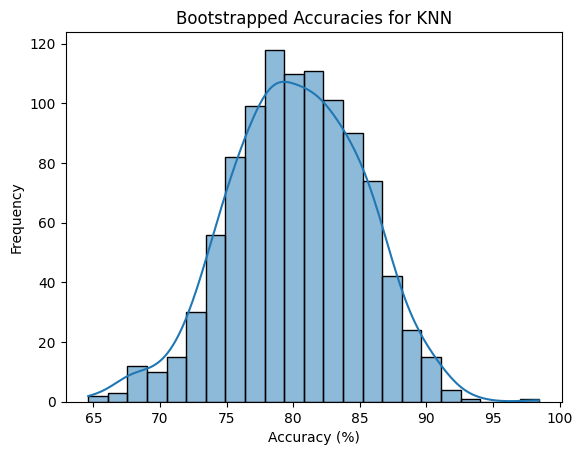

In [7]:
label_encoder = LabelEncoder()
data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])
data_encoded = pd.get_dummies(data_cleaned, columns=['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type'])
X = data_encoded.drop(columns=['Patient_Status', 'Date_of_Surgery', 'Date_of_Last_Visit'])
y = data_encoded['Patient_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print(f"KNN Accuracy: {accuracy_knn:.2f}%")

def bootstrap_accuracy(model, X, y, n_iterations=1000):
    bootstrapped_accuracies = []
    for _ in range(n_iterations):
        X_resample, y_resample = resample(X, y)
        y_pred = model.predict(X_resample)
        acc = accuracy_score(y_resample, y_pred) * 100
        bootstrapped_accuracies.append(acc)
    return bootstrapped_accuracies

bootstrapped_accuracies_knn = bootstrap_accuracy(knn_model, X_test, y_test)
sns.histplot(bootstrapped_accuracies_knn, kde=True)
plt.title('Bootstrapped Accuracies for KNN')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-8-0d0655b130e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])


Logistic Regression Accuracy: 80.00%


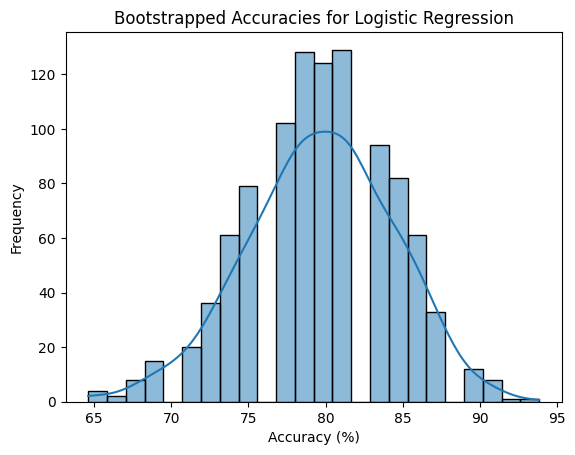

In [8]:
data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])
data_encoded = pd.get_dummies(data_cleaned, columns=['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type'])
X = data_encoded.drop(columns=['Patient_Status', 'Date_of_Surgery', 'Date_of_Last_Visit'])
y = data_encoded['Patient_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}%")

def bootstrap_accuracy(model, X, y, n_iterations=1000):
    bootstrapped_accuracies = []
    for _ in range(n_iterations):
        X_resample, y_resample = resample(X, y)
        y_pred = model.predict(X_resample)
        acc = accuracy_score(y_resample, y_pred) * 100
        bootstrapped_accuracies.append(acc)
    return bootstrapped_accuracies

bootstrapped_accuracies_logistic = bootstrap_accuracy(logistic_model, X_test, y_test)
sns.histplot(bootstrapped_accuracies_logistic, kde=True)
plt.title('Bootstrapped Accuracies for Logistic Regression')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.show()
